In [14]:
# 필요 모듈 import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt #그래프 패키지 모듈 등록

%matplotlib inline 

In [3]:
# 한 셀에서 여러 변수 출력코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [4]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [5]:
df = pd.read_csv("/Users/crlee/pandas/서울시_골목상권_재범주.csv",encoding='cp949',low_memory=False)

### 필요한 열만 추출

In [6]:
select_col = [ '프랜차이즈_점포_수','시군구_명','상권_코드_명','상권별_매출액_평균']
df2 = df[select_col]
df2

,프랜차이즈_점포_수,시군구_명,상권_코드_명,상권별_매출액_평균
0,15,강북구,4.19민주묘지역 2번,1.787499e+08
1,4,강북구,KT&G 북부지사,1.489174e+08
2,13,강북구,가오리역 1번,1.736823e+08
3,6,강북구,가오리역 2번,1.330093e+08
4,9,강북구,강북구청,1.955185e+08
...,...,...,...,...
1082,2,서초구,청계산원터골,7.587535e+08
1083,0,서초구,청계산입구역 2번(내곡동주민센터),5.359684e+08
1084,1,서초구,한국상담대학원대학교,6.713270e+08
1085,2,서초구,한전아트센터,6.967944e+07


### 상권별_매출액_평균으로 내림차순

In [7]:
df2 = df2.sort_values('상권별_매출액_평균', ascending=False)
df2

,프랜차이즈_점포_수,시군구_명,상권_코드_명,상권별_매출액_평균
486,0,용산구,남정초등학교,4.088895e+09
475,4,영등포구,영등포시장역 3번,2.648102e+09
976,42,성동구,성수초등학교,1.761761e+09
975,20,성동구,성수동카페거리,1.704766e+09
844,2,강남구,삼성중앙역 5번,1.663697e+09
...,...,...,...,...
311,3,강서구,백석중학교,1.365018e+07
778,1,은평구,덕산중학교,1.347007e+07
791,1,은평구,수색역 1번,9.737607e+06
386,3,관악구,청림동주민센터(상도중학교),6.867693e+06


### 전체 프렌차이즈 점포 수 평균

In [8]:
mean_all = df2['프랜차이즈_점포_수'].mean()
mean_all

10.78748850045998

### 전체 산점도

Text(0.5, 0, '상권별_매출액_평균')

Text(0, 0.5, '프랜차이즈_점포_수')

Text(0.5, 1.0, '총매출액 프렌차이즈 수')

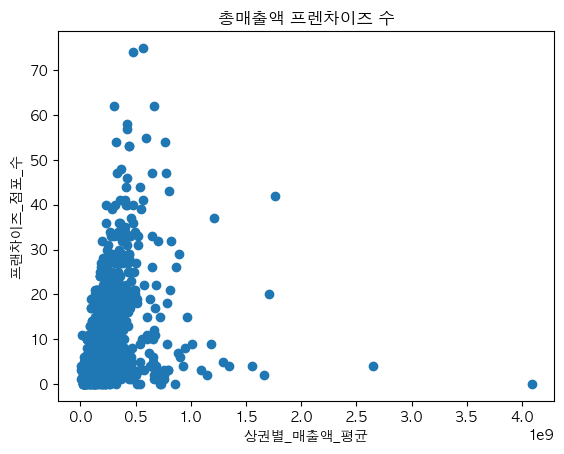

In [41]:
plt.scatter(df2['상권별_매출액_평균'], df2['프랜차이즈_점포_수']) # 산점도 그래프
#plt.plot(df2['상권_코드_명'], df2['프랜차이즈_점포_수']) # 선그래프

# 그래프 레이블 및 제목 설정
plt.xlabel('상권별_매출액_평균')
plt.ylabel('프랜차이즈_점포_수')
plt.title('총매출액 프렌차이즈 수')

# 그래프 표시
plt.show()

### 전체 선형식

Text(0.5, 0, '총매출액')

Text(0, 0.5, '프렌차이즈 수')

Text(0.5, 1.0, 'Linear Equation')

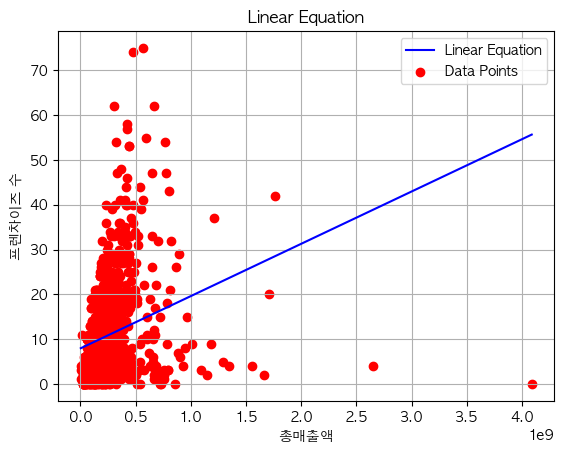

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터프레임에서 x 열과 y 열을 선택합니다.
x = df2['상권별_매출액_평균']
y = df2['프랜차이즈_점포_수']

# 선형식을 구하기 위해 polyfit 함수를 사용하여 최소제곱법을 적용합니다.
coefficients = np.polyfit(x, y, deg=1)
slope = coefficients[0]
intercept = coefficients[1]

# x 값 범위를 정의합니다.
x_range = np.linspace(x.min(), x.max(), 100)

# 선형식을 계산합니다.
y_range = slope * x_range + intercept

# 선형식을 그래프로 그립니다.
plt.plot(x_range, y_range, color='blue', label='Linear Equation')

# 산점도를 그래프로 그립니다.
plt.scatter(x, y, color='red', label='Data Points')

# 축 레이블과 제목을 설정합니다.
plt.xlabel('총매출액')
plt.ylabel('프렌차이즈 수')
plt.title('Linear Equation')

# 그래프에 그리드를 추가합니다.
plt.grid(True)

# 범례(legend)를 표시합니다.
plt.legend()

# 그래프를 표시합니다.
plt.show()

### 상위 25% 추출

In [9]:
# 상권별_매출액_평균을 기준으로 상위 25% 추출
top25 = df2['상권별_매출액_평균'].quantile(0.75)  
top_25 = df2[df2['상권별_매출액_평균'] >= top25] 
top_25

,프랜차이즈_점포_수,시군구_명,상권_코드_명,상권별_매출액_평균
486,0,용산구,남정초등학교,4.088895e+09
475,4,영등포구,영등포시장역 3번,2.648102e+09
976,42,성동구,성수초등학교,1.761761e+09
975,20,성동구,성수동카페거리,1.704766e+09
844,2,강남구,삼성중앙역 5번,1.663697e+09
...,...,...,...,...
406,13,금천구,독산동정훈단지,2.914204e+08
977,8,성동구,성원어린이공원,2.911916e+08
118,39,구로구,오류2동버들시장,2.903259e+08
98,1,구로구,고척중학교,2.901136e+08


### 상위 25% 프렌차이즈 점포 수 평균

In [10]:
mean_25 = top_25['프랜차이즈_점포_수'].mean()
mean_25

17.78676470588235

Text(0.5, 0, '상권_코드_명')

Text(0, 0.5, '프랜차이즈_점포_수')

Text(0.5, 1.0, '총매출액 상위 25% 프렌차이즈 수')

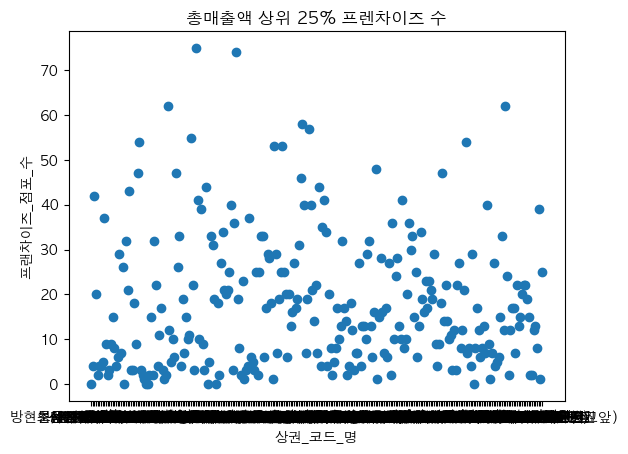

In [27]:
plt.scatter(top_25['상권_코드_명'], top_25['프랜차이즈_점포_수']) # 산점도 그래프
# plt.plot(top_25['상권_코드_명'], top_25['프랜차이즈_점포_수']) # 선그래프

# 그래프 레이블 및 제목 설정
plt.xlabel('상권_코드_명')
plt.ylabel('프랜차이즈_점포_수')
plt.title('총매출액 상위 25% 프렌차이즈 수')

# 그래프 표시
plt.show()




{'whiskers': [<matplotlib.lines.Line2D at 0x7ff5e4d14a60>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff5e4d14eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff5e4d159c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff5e4d15990>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff5e4d14370>],
 'means': []}

Text(0, 0.5, '프랜차이즈_점포_수')

Text(0.5, 1.0, '총매출액 상위 25% 프렌차이즈 수')

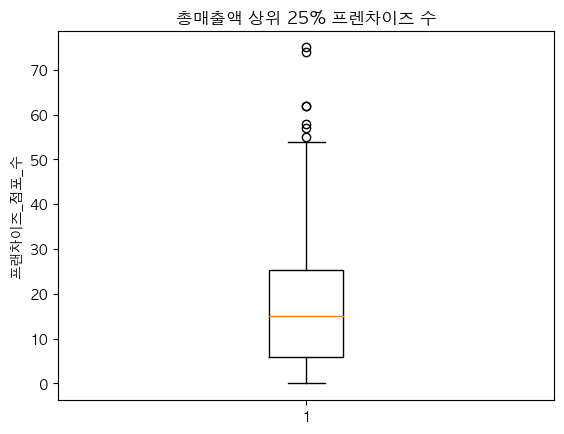

In [33]:
import matplotlib.pyplot as plt

plt.boxplot(top_25['프랜차이즈_점포_수'])
plt.ylabel('프랜차이즈_점포_수')
plt.title('총매출액 상위 25% 프렌차이즈 수')
plt.show()

### 전체 박스플롯

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff5e5e0fd00>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff5e5ec8220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff5e5e0fa60>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff5e5ec8760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff5e5ec8a00>],
 'means': []}

Text(0, 0.5, '프랜차이즈_점포_수')

Text(0.5, 1.0, '서울시 프렌차이즈 수')

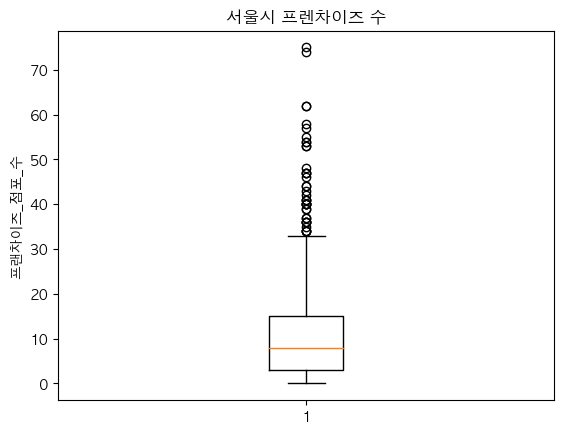

In [32]:
import matplotlib.pyplot as plt

plt.boxplot(df2['프랜차이즈_점포_수'])
plt.ylabel('프랜차이즈_점포_수')
plt.title('서울시 프렌차이즈 수')
plt.show()